<a href="https://colab.research.google.com/github/jutourru/portfolio/blob/main/Desafio02_womarkercode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#[CHALLENGE] Análise de Correlação 



Suponha que você trabalhe em uma empresa do setor imobiliário. Para essa empresa é
muito importante precificar corretamente o imóvel, caso contrário, os corretores
podem perder a venda. 

Como parte do time de dados, você é responsável por analisar os principais fatores que podem afetar o preço dos imóveis. Para isso, eles enviaram a base de dados (desafio_01_preco_imoveis.csv). 

**Como você poderia ajudá-los?**
Para responder esse desafio: A base de dados: desafio_01_preco_imoveis.csv contém as
seguintes informações:

● id : código identificador do imóvel <br>
● date: data em que o imóvel foi cadastrado<br>
● price: preço do imóvel<br>
● bedrooms: número de quartos<br>
● bathrooms: número de banheiros<br>
● sqft_living: tamanho do imóvel (dentro da casa)<br>
● sqft_lot: tamanho do lote / terreno<br>
● floors: andares<br>
● waterfront: flag se o imóvel tem vista para o mar. 1 caso positivo, 0 caso contrário. <br>
● view: indica o número de quartos com vista.<br>
● condition: condição do imóvel, escala de 1 a 5<br>
● grade: nota do imóvel<br>
● sqft_above: tamanho da casa acima do solo (excluindo porão)<br>
● sqft_basement: tamanho do porão<br>
● yr_built: ano em que a casa foi construída<br>
● yr_renovated: ano em que a casa foi renovada<br>
● zipcode: "CEP" do imóvel<br> 
● lat: latitude do imóvel<br>
● long: longitude do imóvel<br>

<br><br>
1. Analise a correlação de todas as variáveis com o preço do imóvel. 
1.1. Quais variáveis são mais correlacionadas? 
1.2. Quais são menos correlacionadas?


2. Para as top 5 variáveis mais correlacionadas com o preço:
2.1. plote as suas distribuições (histograma e boxplot)
2.2. plote o scatterplot (gráfico de dispersão), contendo preço no eixo Y e a
variável correlacionada no eixo X.
2.3. para cada uma das 5 variáveis faça uma regressão linear simples sendo
preciso a variável resposta (y) e interprete os resultados.

In [ ]:
#bibliotecas usadas no projeto

import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import probplot
import matplotlib.pyplot as plt

In [ ]:
desafio02_df = pd.read_csv ('/content/desafio_01_preco_imoveis.csv')
desafio02_df


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069


In [ ]:
desafio02_df_copia = desafio02_df.copy()

In [ ]:
desafio02_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000


In [ ]:
desafio02_df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long'],
      dtype='object')

In [ ]:
desafio02_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
desafio02_df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
dtype: int64


Analise a correlação de todas as variáveis com o preço do imóvel. Quais variáveis são mais correlacionadas? Quais são menos correlacionadas?



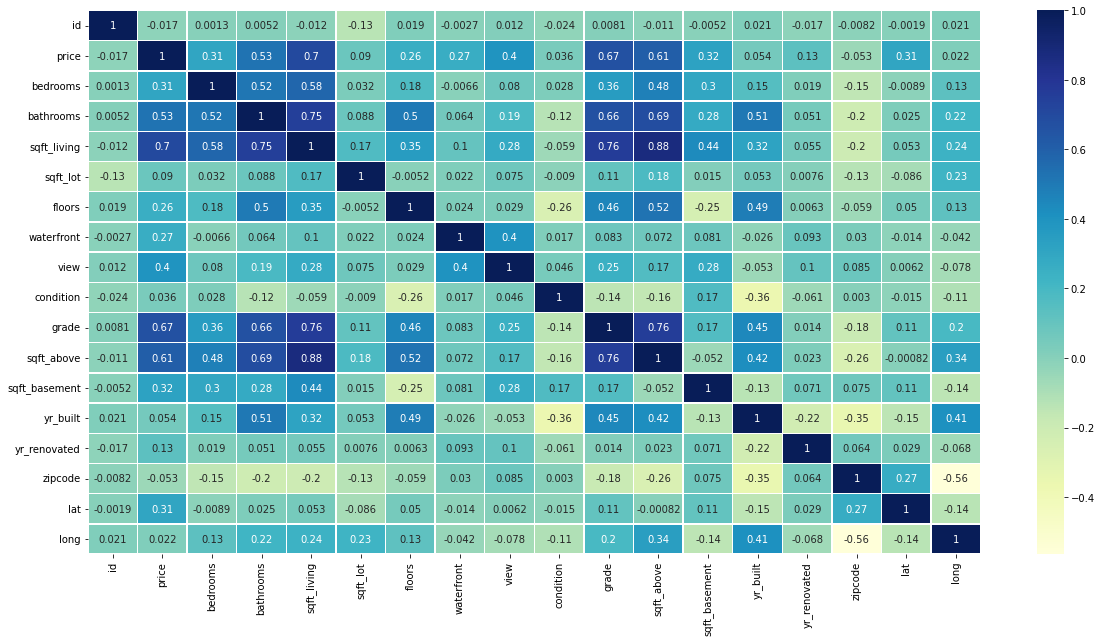

In [ ]:
corr_df = desafio02_df.corr(method='pearson')

plt.figure(figsize=(20,10))
sns.heatmap(corr_df, annot=True, cmap='YlGnBu', linewidths=.5)
plt.show()

#fonte de consulta: https://seaborn.pydata.org/generated/seaborn.heatmap.html


  Top 5 - variáveis mais relacionadas:<br>
   'sqft_living', 'grade', 'sqft_above','bathrooms','view'


Top 5 - variáveis menos relacionadas:<br>
'zipcode', 'long', 'yr_built', 'condition', 'sqft_lot'


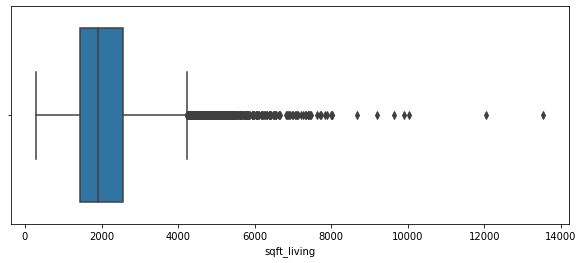

In [ ]:
ax = sns.boxplot(x='sqft_living', data =desafio02_df)
ax.figure.set_size_inches(10, 4)
plt.xticks(rotation = 0);

O gráfico deixa em evidência a presença de outlier na avaliação da variável tamanho do imóvel (dentro da casa).

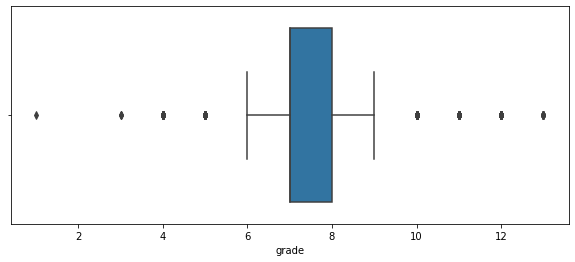

In [ ]:
ax = sns.boxplot(x='grade', data =desafio02_df)
ax.figure.set_size_inches(10, 4)
plt.xticks(rotation = 0);

Já ao fazer a avalição das variáveis da nota do imóvel, noto que ela tem média 7 e 8. 

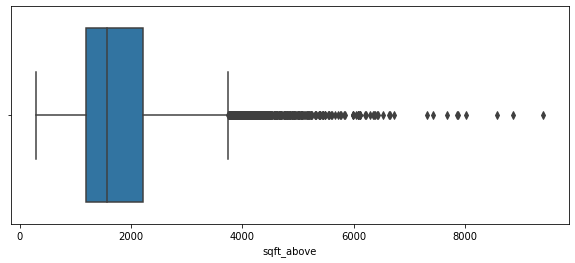

In [ ]:
ax = sns.boxplot(x='sqft_above', data =desafio02_df)
ax.figure.set_size_inches(10, 4)
plt.xticks(rotation = 0);

O tamanho da casa acima do solo (excluindo porão) é outra variável com diversos outliers. 

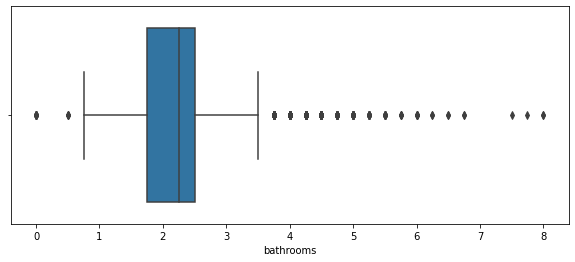

In [ ]:
ax = sns.boxplot(x='bathrooms', data =desafio02_df)
ax.figure.set_size_inches(10, 4)
plt.xticks(rotation = 0);

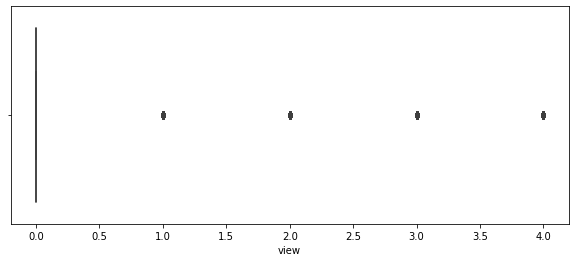

In [ ]:
ax = sns.boxplot(x='view', data =desafio02_df)
ax.figure.set_size_inches(10, 4)
plt.xticks(rotation = 0);
#variável discreta

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


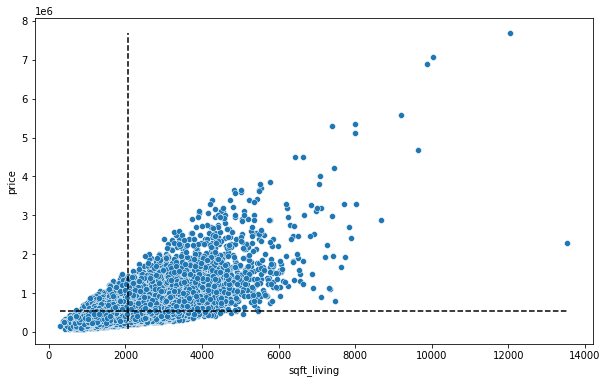

In [ ]:
x = desafio02_df.sqft_living
y = desafio02_df.price

ax = sns.scatterplot(x, y)
ax.figure.set_size_inches(10, 6)
ax.hlines(y = y.mean(), xmin = x.min(), xmax = x.max(), colors='black', linestyles='dashed')
ax.vlines(x = x.mean(), ymin = y.min(), ymax = y.max(), colors='black', linestyles='dashed')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


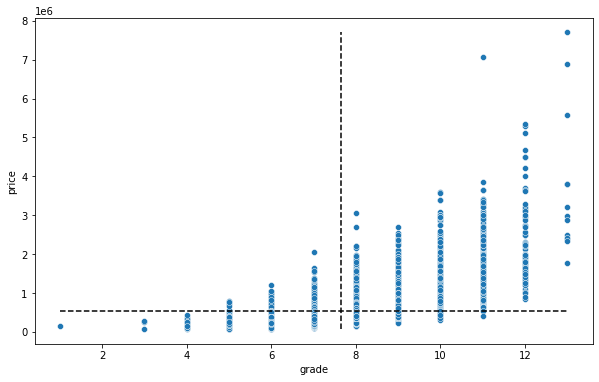

In [ ]:
x = desafio02_df.grade
y = desafio02_df.price

ax = sns.scatterplot(x, y)
ax.figure.set_size_inches(10, 6)
ax.hlines(y = y.mean(), xmin = x.min(), xmax = x.max(), colors='black', linestyles='dashed')
ax.vlines(x = x.mean(), ymin = y.min(), ymax = y.max(), colors='black', linestyles='dashed')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


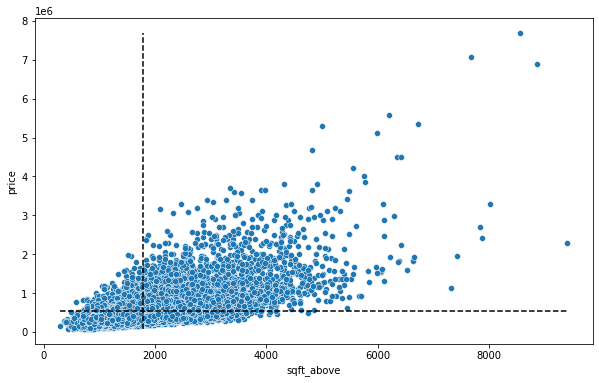

In [ ]:
x = desafio02_df.sqft_above
y = desafio02_df.price

ax = sns.scatterplot(x, y)
ax.figure.set_size_inches(10, 6)
ax.hlines(y = y.mean(), xmin = x.min(), xmax = x.max(), colors='black', linestyles='dashed')
ax.vlines(x = x.mean(), ymin = y.min(), ymax = y.max(), colors='black', linestyles='dashed')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


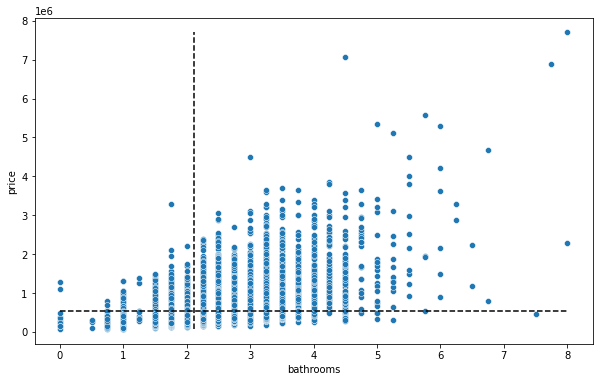

In [ ]:
x = desafio02_df.bathrooms
y = desafio02_df.price

ax = sns.scatterplot(x, y)
ax.figure.set_size_inches(10, 6)
ax.hlines(y = y.mean(), xmin = x.min(), xmax = x.max(), colors='black', linestyles='dashed')
ax.vlines(x = x.mean(), ymin = y.min(), ymax = y.max(), colors='black', linestyles='dashed')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


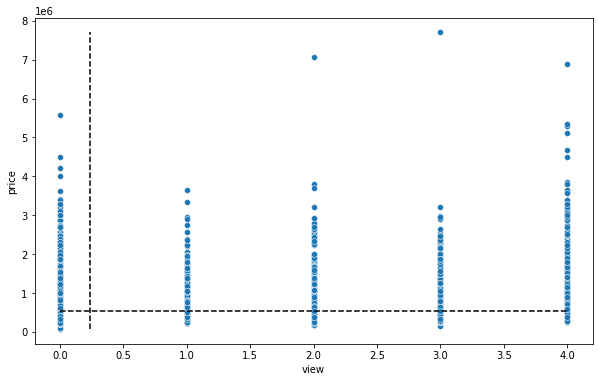

In [ ]:
x = desafio02_df.view
y = desafio02_df.price

ax = sns.scatterplot(x, y)
ax.figure.set_size_inches(10, 6)
ax.hlines(y = y.mean(), xmin = x.min(), xmax = x.max(), colors='black', linestyles='dashed')
ax.vlines(x = x.mean(), ymin = y.min(), ymax = y.max(), colors='black', linestyles='dashed')

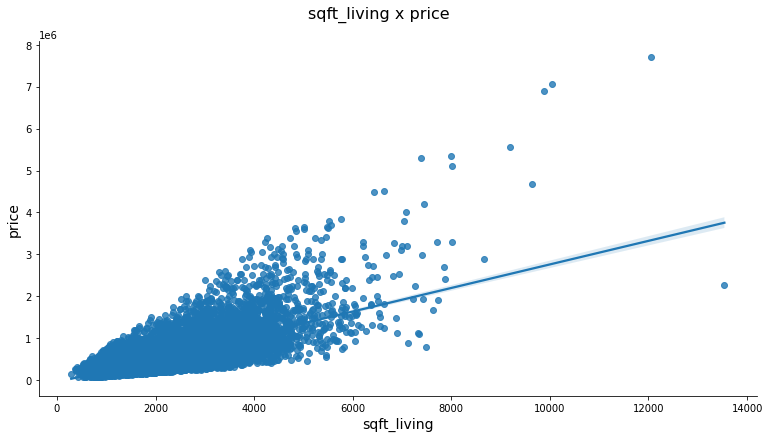

In [ ]:
ax = sns.lmplot(x='sqft_living', y='price', data=desafio02_df)
ax.fig.set_size_inches(12, 6)
ax.fig.suptitle('sqft_living x price', fontsize=16, y=1.02)
ax.set_xlabels('sqft_living', fontsize=14)
ax.set_ylabels('price', fontsize=14)
ax

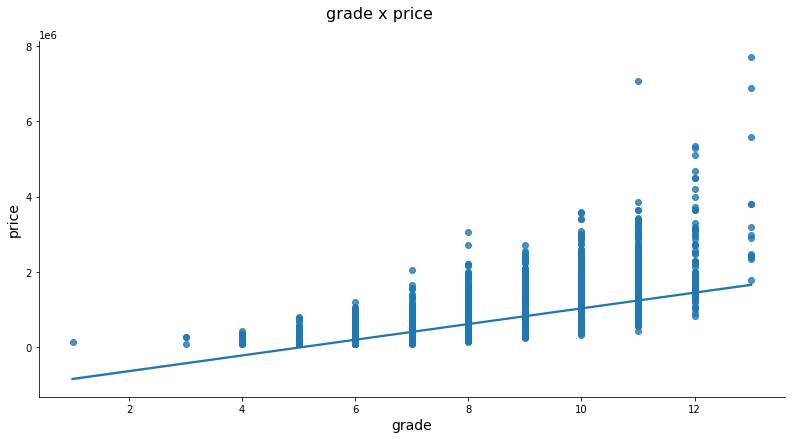

In [ ]:
ax = sns.lmplot(x='grade', y='price', data=desafio02_df)
ax.fig.set_size_inches(12, 6)
ax.fig.suptitle('grade x price', fontsize=16, y=1.02)
ax.set_xlabels('grade', fontsize=14)
ax.set_ylabels('price', fontsize=14)
ax


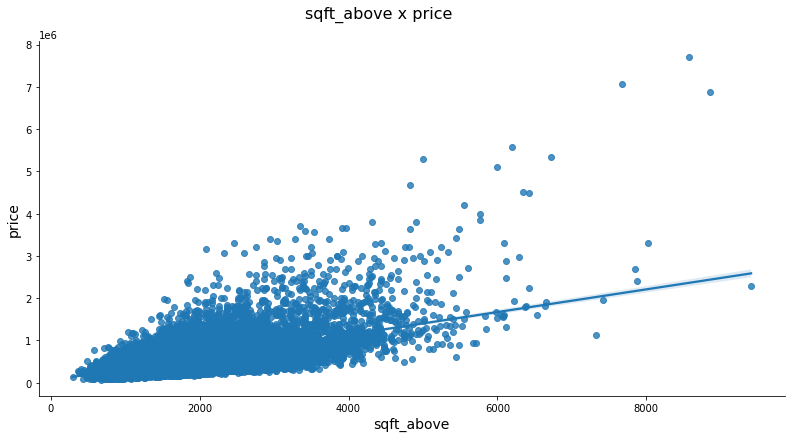

In [ ]:
ax = sns.lmplot(x='sqft_above', y='price', data=desafio02_df)
ax.fig.set_size_inches(12, 6)
ax.fig.suptitle('sqft_above x price', fontsize=16, y=1.02)
ax.set_xlabels('sqft_above', fontsize=14)
ax.set_ylabels('price', fontsize=14)
ax


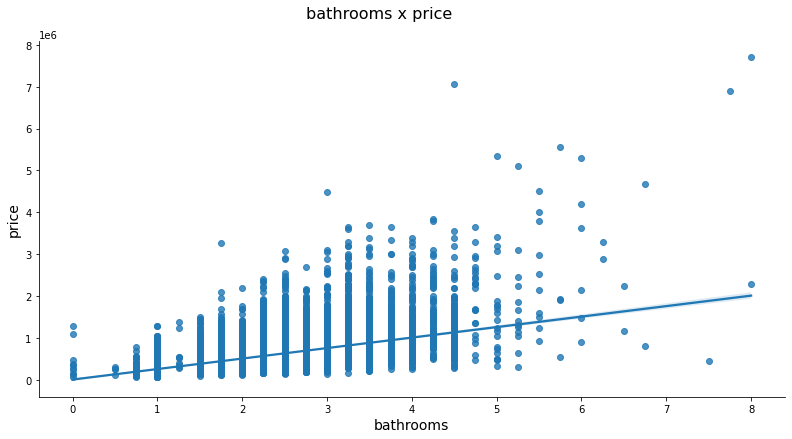

In [ ]:
ax = sns.lmplot(x='bathrooms', y='price', data=desafio02_df)
ax.fig.set_size_inches(12, 6)
ax.fig.suptitle('bathrooms x price', fontsize=16, y=1.02)
ax.set_xlabels('bathrooms', fontsize=14)
ax.set_ylabels('price', fontsize=14)
ax

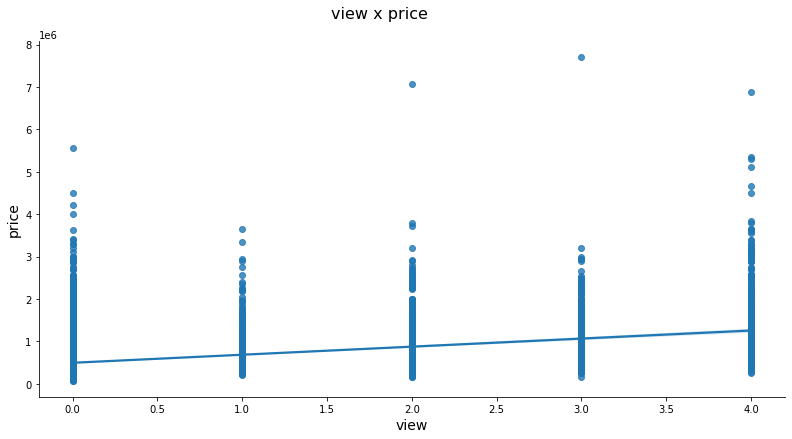

In [ ]:
ax = sns.lmplot(x='view', y='price', data=desafio02_df)
ax.fig.set_size_inches(12, 6)
ax.fig.suptitle('view x price', fontsize=16, y=1.02)
ax.set_xlabels('view', fontsize=14)
ax.set_ylabels('price', fontsize=14)
ax

#variável 
#regressão linear precisa de dados continuos e não discretos. 
#Sem esse cuidado, o gráfico aparece com dados incorreto. O que impossibilita uma análise.  

<h1> Conclusão: </h1> 

Como a missão do cientista de dados ao receber um dataset se inicia por um estudo no segmento do qual o cliente atua, no caso em questão, é o mercado imobiliário, foi realizado previamente uma pesquisa de conteúdo a fim de identificar os principais pontos (as principais variáveis) que valorizam um imóvel.

Entre as diversas consultas, destaco a informação coletada no site do Quinto Andar, na qual há a ressalva para o fato de que um imóvel deve reunir qualidade, custo e utilidade para ser devidamente valorizado. "Em uma análise geral, seu potencial deve refletir o quanto aumenta o valor do bem em relação ao seu preço inicial.  Sendo assim, inicialmente podemos considerar alguns fatores mais objetivos levados em conta, por exemplo: Localização, Qualidade de vida na região do imóvel (como oferta de comércios, serviços, segurança e lazer), Estruturas e infraestruturas em sua construção”.*

Ou seja, a localização deve ser um ponto-chave para os cientistas de dados que atuam nessa imobiliária avaliarem os valores do imóvel. Na prática, não é isso o que acontece no dataset atual. Isso ficou em evidência ao final da análise de dados. 
 
A análise de dados foi realizada conforme as orientações prévias recebidas no briefing. Seu ponto de partida foi a exibição de 10 análises de correlação com o preço do imóvel. Diante disso, pode-se avaliar as variáveis que são as 5 mais correlacionadas e também as 5 menos correlacionadas.

No caso, chama a atenção o fato de o cep (zipcode)  estar entre as cinco variáveis não correlacionadas. Esse dado precisa ser tratado de outra forma. Há a necessidade de uma análise bem detalhada para que ele possa ser a principal variável correlacionada ao valor do imóvel. 

Seria importante também criar novas variáveis, serviços (escola próxima), segurança,  lazer e Estruturas e infraestruturas em sua construção)  com o intuito de atrelar e correlacionar o valor do imóvel a essas variáveis determinantes para um comprador fechar a compra do imóvel. O que resultaria em maior acurácia nos valores dos imóveis e certamente mais rentabilidade aos corretores. 

*fonte:https://conteudos.quintoandar.com.br/valorizacao-de-imovel/#o-que-influencia-valorizacao
